In [12]:
!pip install pandas matplotlib
!pip install sqlalchemy mysql-connector-python

In [13]:
import pandas as pd # primary data structure library
import numpy as np  # useful for many scientific computing in Python
import matplotlib.pyplot as plt
import matplotlib as mpl
from sqlalchemy import create_engine
from credentials import mysql_username, mysql_password

In [14]:
# Database connection using SQLAlchemy
database_username = mysql_username
database_password = mysql_password
database_ip       = 'localhost'
database_name     = 'creditcard_capstone'
database_connection = create_engine(f'mysql+pymysql://{database_username}:{database_password}@{database_ip}/{database_name}')

In [15]:
# Execute SQL queries and store the results in pandas DataFrames
# Find and plot which transaction type has the highest transaction count.
df_transaction_type = pd.read_sql("""
SELECT TRANSACTION_TYPE, COUNT(*) AS transaction_count
FROM cdw_sapp_credit_card
GROUP BY TRANSACTION_TYPE
ORDER BY transaction_count DESC
""", con=database_connection)

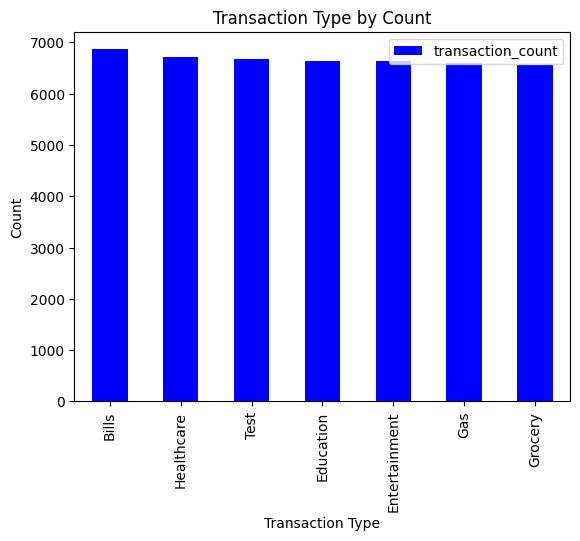

In [16]:
# Visualization
# Functional Requirements 3.1
# Transaction type vs count
df_transaction_type.plot(kind='bar', x='TRANSACTION_TYPE', y='transaction_count', color='blue')
plt.title('Transaction Type by Count')
plt.ylabel('Count')
plt.xlabel('Transaction Type')
plt.show()

In [17]:
# Execute SQL queries and store the results in pandas DataFrames
# Find and plot which state has a high number of customers.
df_state_customers = pd.read_sql("""
SELECT CUST_STATE, COUNT(SSN) AS number_of_customers
FROM cdw_sapp_customer
GROUP BY CUST_STATE
ORDER BY number_of_customers DESC
""", con=database_connection)

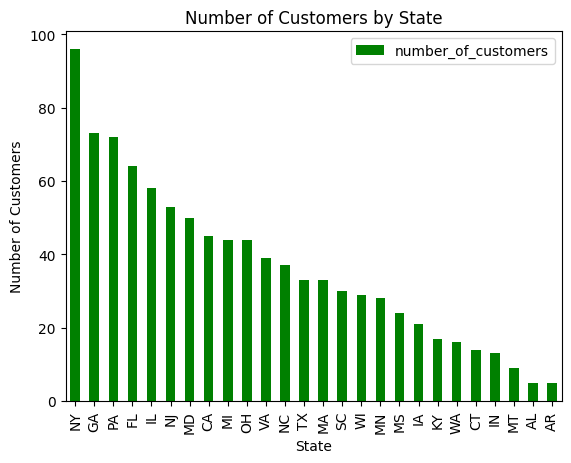

In [18]:
# Functional Requirements 3.2
# State vs number of customers
df_state_customers.plot(kind='bar', x='CUST_STATE', y='number_of_customers', color='green')
plt.title('Number of Customers by State')
plt.ylabel('Number of Customers')
plt.xlabel('State')
plt.show()

In [19]:
# Execute SQL queries and store the results in pandas DataFrames
# Find and plot the sum of all transactions for the top 10 customers, and which customer has the highest transaction amount.
# Hint (use CUST_SSN). 
df_top_customers = pd.read_sql("""
SELECT cc.CUST_SSN, c.FIRST_NAME, c.LAST_NAME, SUM(cc.TRANSACTION_VALUE) AS total_transaction_amount
FROM cdw_sapp_credit_card cc
INNER JOIN cdw_sapp_customer c ON cc.CUST_SSN = c.SSN
GROUP BY cc.CUST_SSN, c.FIRST_NAME, c.LAST_NAME
ORDER BY total_transaction_amount DESC
LIMIT 10
""", con=database_connection)

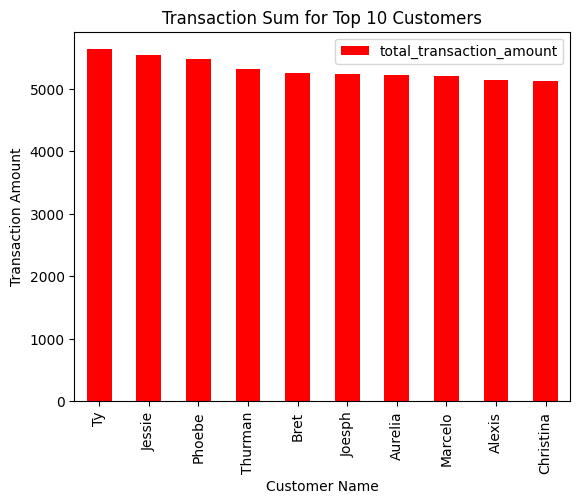

In [20]:
# Functional Requirements 3.2
# Top 10 customers vs transaction amount
df_top_customers.plot(kind='bar', x='FIRST_NAME', y='total_transaction_amount', color='red')
plt.title('Transaction Sum for Top 10 Customers')
plt.ylabel('Transaction Amount')
plt.xlabel('Customer Name')
plt.show()